In [1]:
#import basic libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

In [3]:
#first 5 rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Domain analysis

- Hours: no of hours the student has dedicated for studying the subjects
- Scores: The score obtained by the student

### Data preprocessing

In [4]:
# first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
# check for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- No null values in the given dataset

In [7]:
# check for duplicated values
data.duplicated().sum()

0

- No duplicate values in the given data

In [10]:
# how many students are dedicated to study for specific hours
data.Hours.value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [12]:
# How many students obtained the particular percent of marks
data.Scores.value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

In [36]:
x=data[['Hours']]
Y=data['Scores']

<Axes: xlabel='Hours'>

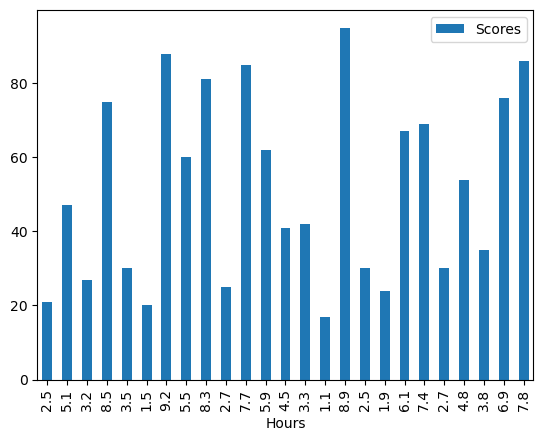

In [63]:
data.plot(x='Hours',y='Scores',kind='bar')

- From the given graph it shows a positive corelation of variables
- More hours the student spends on studies more marks he is able to score

## Split of train and test data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test= train_test_split(x,Y,random_state=2,test_size=0.3)

In [39]:
y_train

12    41
22    35
4     30
10    85
5     20
19    69
1     47
2     27
7     60
21    54
20    30
18    67
11    62
24    86
13    42
15    95
8     81
Name: Scores, dtype: int64

### Model Creation

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model= LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
model_test= LinearRegression()

In [44]:
model_test.fit(x_test,y_test)

LinearRegression()

In [49]:
y_pred= model.predict(x_test)

In [47]:
# prediction of marks obtained for 9.2 hours of study
model.predict([[9.25]])

D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([96.016123])

- Thus according to the model the student scores 96% of marks 

### Evaluation of the model

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [51]:
r2_score(y_test,y_pred)

0.9420584734434517

In [53]:
mean_squared_error(y_test,y_pred)

44.426665487233365

In [54]:
mean_absolute_error(y_test,y_pred)

5.936576124243742